In [1]:
# Import Modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Dataset
data = pd.read_csv('Cleaned_Spotify.csv')
data.drop(["id","artists","name","release_date"],axis=1,inplace=True)
data = data.iloc[: , 1:]

In [3]:
# data = data[data.year >= 1960]
data.head()
data.shape 

(165711, 15)

In [4]:
data.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,165711.000000,165711.000000,1.657110e+05,165711.000000,165711.000000,165711.000000,165711.000000,165711.000000,165711.000000,165711.000000,165711.000000,165711.000000,165711.000000,165711.000000,165711.000000
mean,0.492981,0.536652,2.330355e+05,0.493680,0.074431,0.164365,5.201405,0.205676,-11.262813,0.709796,32.058687,0.084475,117.054982,0.531604,1977.840976
std,0.376984,0.175685,1.216101e+05,0.267003,0.262471,0.311035,3.508201,0.176947,5.629660,0.453858,21.404763,0.120758,30.717050,0.263759,25.326058
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.092900,0.415000,1.724000e+05,0.270000,0.000000,0.000000,2.000000,0.098000,-14.273000,0.000000,14.000000,0.034900,93.693000,0.320000,1958.000000
50%,0.493000,0.546000,2.097600e+05,0.488000,0.000000,0.000232,5.000000,0.134000,-10.376000,1.000000,34.000000,0.044800,114.908000,0.543000,1979.000000
75%,0.888000,0.665000,2.642000e+05,0.714000,0.000000,0.095400,8.000000,0.260000,-7.063000,1.000000,48.000000,0.073400,135.846000,0.752000,1999.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.968000,244.091000,1.000000,2020.000000


In [5]:
pd.isnull(data).sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
explicit            0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
popularity          0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

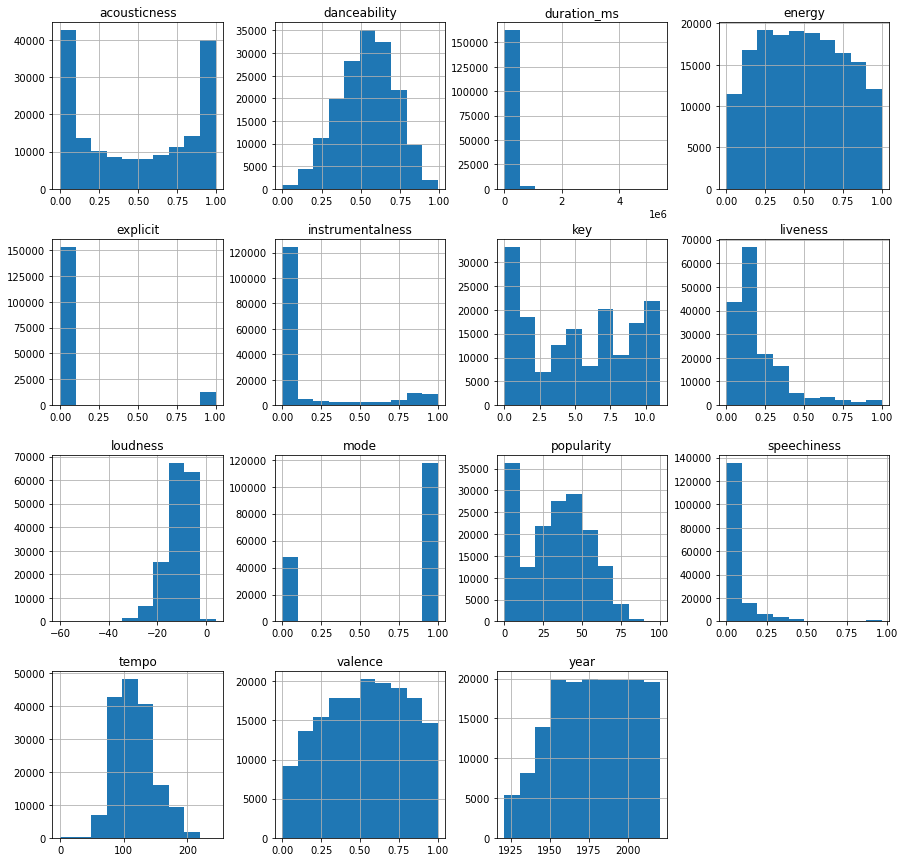

In [6]:
data.hist(figsize=(15, 15))
plt.show()

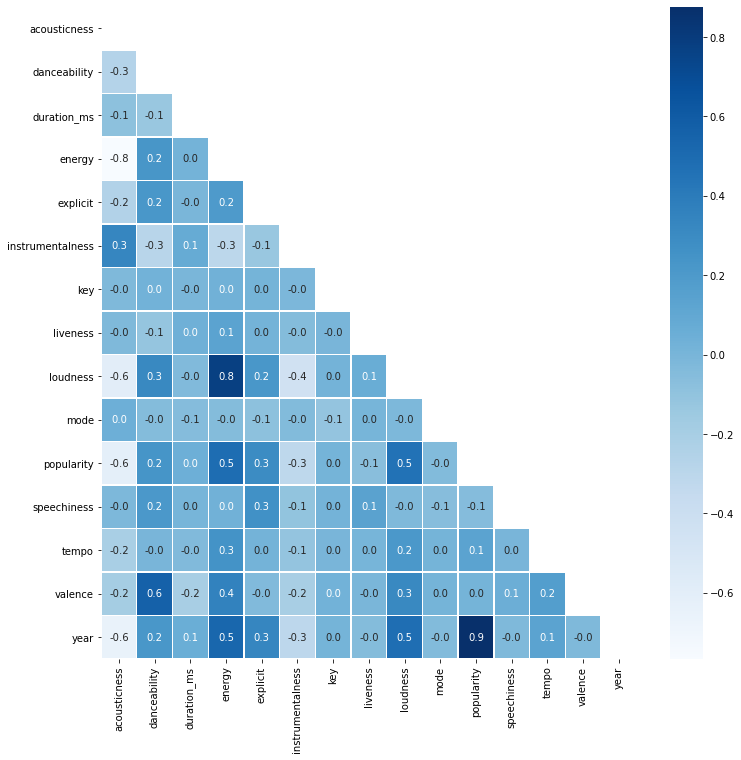

In [7]:
f,ax = plt.subplots(figsize=(12, 12))
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data.corr(), annot=True, linewidths=0.4,linecolor="white", fmt= '.1f',ax=ax,cmap="Blues",mask=mask)
plt.show() 

In [8]:
'''
Takeaways -
1. danceability and valence - High Positive Correlation.
2. loudness and energy - High Positive Correlation.
3. accousticness has negative correlation with energy, loudness, popularity and year.
4. popularity is highly positively correlated with year. 
5. loudness and energy have strong correlation with popularity.
'''

'\nTakeaways -\n1. danceability and valence - High Positive Correlation.\n2. loudness and energy - High Positive Correlation.\n3. accousticness has negative correlation with energy, loudness, popularity and year.\n4. popularity is highly positively correlated with year. \n5. loudness and energy have strong correlation with popularity.\n'

In [9]:
data["popularity"]= [ 1 if i>=50 else 0 for i in data.popularity ]
data["popularity"].value_counts()

0    127520
1     38191
Name: popularity, dtype: int64

In [10]:
features = ['acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'loudness',
 'tempo',
'year']

In [11]:
X = data[features]
y = data['popularity']

In [12]:
X.shape

(165711, 7)

In [13]:
X.head()

,acousticness,danceability,energy,instrumentalness,loudness,tempo,year
0,0.995,0.708,0.1950,0.563,-12.428,118.469,1928
1,0.994,0.379,0.0135,0.901,-28.454,83.972,1928
2,0.604,0.749,0.2200,0.000,-19.924,107.177,1928
3,0.995,0.781,0.1300,0.887,-14.734,108.003,1928
4,0.990,0.210,0.2040,0.908,-16.829,62.149,1928


In [14]:
y.shape

(165711,)

In [15]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: popularity, dtype: int64

In [16]:
# Data Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
print(np.mean(y_train), np.mean(y), np.mean(y_test))

0.2311094252437563 0.23046750064871976 0.22896970672245243


In [17]:
# Normalisation
from sklearn.preprocessing import MinMaxScaler
sc_x = MinMaxScaler()
X_train = sc_x.fit_transform(X_train) 
X_test = sc_x.transform(X_test)

In [18]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression() 
logreg.fit(X_train, y_train)
logreg.coef_, logreg.intercept_

(array([[-1.76882532e-01,  5.29875644e-01, -7.06424184e-01,
         -3.86252121e-01,  1.91624948e+00,  8.29131823e-03,
          9.04483755e+00]]),
 array([-8.81473732]))

In [19]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
y_test_pred = logreg.predict(X_test)
logreg_matrix = confusion_matrix(y_test, y_test_pred)
logreg_matrix

array([[35221,  3110],
       [ 3863,  7520]])

In [20]:
print("TP is:", logreg_matrix[1, 1])
print("TN is:", logreg_matrix[0, 0])
print("FP is:", logreg_matrix[0, 1])
print("FN is:", logreg_matrix[1, 0])

TP is: 7520
TN is: 35221
FP is: 3110
FN is: 3863


In [21]:
# Metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print('Precision score:', precision_score(y_test, y_test_pred))
print('Recall score:', recall_score(y_test, y_test_pred))
print('Accuracy score:', accuracy_score(y_test, y_test_pred))
print('F1 score:', f1_score(y_test, y_test_pred))

Precision score: 0.7074317968015051
Recall score: 0.6606342791882632
Accuracy score: 0.859737699641952
F1 score: 0.6832326352609821


In [22]:
# Grid Search CV
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge

logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2'}
accuracy : 0.8593154180949012


Text(0, 0.5, 'Precision')

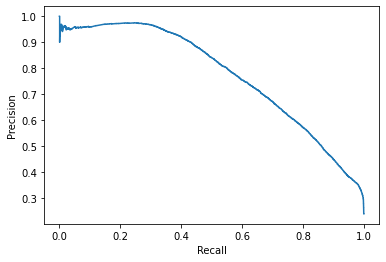

In [23]:
#Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
# Get probability
logreg.predict_proba(X_test)  # 1 - pihat, pihat
prob_test = logreg.predict_proba(X_test)[:, 1]
# Collect Necessary Measures
precision, recall, thred = precision_recall_curve(y_test, prob_test)
# Plot Figure
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')

Text(0, 0.5, 'TPR')

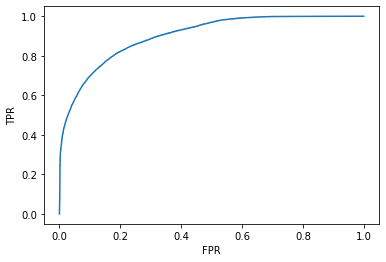

In [24]:
# ROC Curve
from sklearn.metrics import roc_curve

# Get Measures
fpr, tpr, thred_roc = roc_curve(y_test, prob_test)

# Generate Figure
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [25]:
from sklearn.metrics import roc_auc_score
# we have obtained the predicted probability in the previous step: y_pred_proba

print("AUC for logistic regression:", roc_auc_score(y_test, prob_test)  )

AUC for logistic regression: 0.9012052591287945


In [26]:
# End of Logistic Regression